In [88]:
# Import Depedencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [95]:
# Import cleaned csv
csvfile1 = "Resources/Cleaned_Vaccine_Case_Data.csv"

# Add as DataFrame
main_df = pd.read_csv(csvfile1)


In [96]:
# Clean up missing values
main_clean_salary_df = main_df.loc[main_df['Median Household Income'] != '-']
# Change Income type to integer
main_clean_salary_df['Median Household Income'] = main_clean_salary_df['Median Household Income'].astype(int)
# Verify type
type(main_clean_salary_df['Median Household Income'][9])


numpy.int32

In [97]:
# Read Vaccine Distribution CSV file
vacc_file = "Resources/Vaccine_Distribution.csv"
distribution_initial_df = pd.read_csv(vacc_file)
# Clean rows
distribution_initial_df = distribution_initial_df.dropna()
# Change Zipcodes to integers so files can merge
distribution_initial_df['Vaccine Distribution Zipcodes'] = distribution_initial_df['Vaccine Distribution Zipcodes'].astype(int)
# Group Vaccine Dist by zipcodes
distribution_df = distribution_initial_df[['Distribution Location','Vaccine Distribution Zipcodes']].groupby('Vaccine Distribution Zipcodes').count().reset_index()
# Clean up DataFrame
distribution_df = distribution_df.rename(columns={'Vaccine Distribution Zipcodes': 'POSTCODE'})

# Merge new DataFrame with main DataFrame from 'Initial Data Cleaning.ipynb'
distribution_vs_salary_df = pd.merge(distribution_df, main_clean_salary_df, on='POSTCODE', how='inner')
distribution_vs_salary_df = distribution_vs_salary_df[['POSTCODE', 'Distribution Location', 'Median Household Income']]

distribution_vs_salary_df




,POSTCODE,Distribution Location,Median Household Income
0,85004,3,41951
1,85006,5,38121
2,85007,1,34667
3,85008,4,43574
4,85009,1,32893
...,...,...,...
192,86413,1,38292
193,86426,3,50535
194,86440,1,47437
195,86442,9,39600


The Max Value for Median Household Income is 163750 and the Min Value is 29617


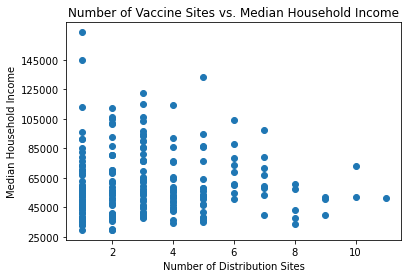

In [98]:
# Scatter plot of all data--probably getting rid of this one
max_salary = distribution_vs_salary_df['Median Household Income'].max()
min_salary = distribution_vs_salary_df['Median Household Income'].min()
print(f'The Max Value for Median Household Income is {max_salary} and the Min Value is {min_salary}')
plt.scatter(distribution_vs_salary_df.iloc[:,1], distribution_vs_salary_df.iloc[:,2])
plt.xlabel('Number of Distribution Sites')
plt.ylabel('Median Household Income')
plt.yticks(np.arange(25000, 165000, step = 20000))
plt.title('Number of Vaccine Sites vs. Median Household Income')
plt.show()

In [105]:
# Set bins for median household income
bins = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 165000]
group_names = ['$20-$40', '$41-$60', '$61-$80', '$81-$100', '$101-$120', '$121-$140', '$141-$165']
distribution_vs_salary_df['Median Incomes'] = pd.cut(distribution_vs_salary_df['Median Household Income'], bins, labels=group_names, include_lowest=True)
# Create DataFrame with binned income; group by binned income
median_income_df = distribution_vs_salary_df[['Distribution Location','Median Incomes']].groupby('Median Incomes').sum().reset_index()
median_income_zipcodes_df = distribution_vs_salary_df[['POSTCODE','Median Incomes']].groupby('Median Incomes').count().reset_index()
median_income_zipcodes_df
#median_income_df

,Median Incomes,POSTCODE
0,$20-$40,28
1,$41-$60,88
2,$61-$80,41
3,$81-$100,25
4,$101-$120,11
5,$121-$140,2
6,$141-$165,2


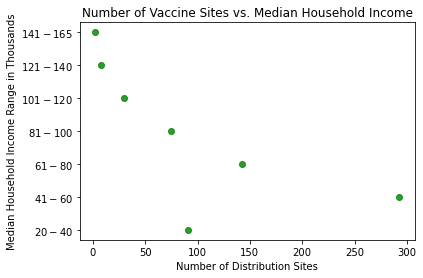

In [100]:
# Scatter plot of data--will probably go with bar chart below instead
max_salary = distribution_vs_salary_df['Median Household Income'].max()
min_salary = distribution_vs_salary_df['Median Household Income'].min()
plt.scatter(median_income_df.iloc[:,1], median_income_df.iloc[:,0], color='g', alpha=.8)
plt.xlabel('Number of Distribution Sites')
#plt.xticks(rotation = 45)
plt.ylabel('Median Household Income Range in Thousands')
plt.yticks(group_names)
plt.title('Number of Vaccine Sites vs. Median Household Income')
plt.show()

The Max Value of the Median Household Incomes is 163750 and the Min Value is 29617. The Median Household Income for the state is 56402.0


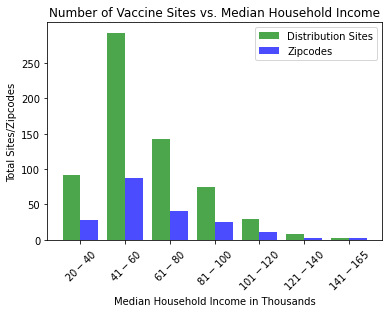

In [112]:
# Bar chart of distribution site count in zipcodes with median household incomes that fall in each bin
max_salary = distribution_vs_salary_df['Median Household Income'].max()
min_salary = distribution_vs_salary_df['Median Household Income'].min()
median_salary = distribution_vs_salary_df['Median Household Income'].median()
print(f'The Max Value of the Median Household Incomes is {max_salary} and the Min Value is {min_salary}. The Median Household Income for the state is {median_salary}')

x = median_income_df.iloc[:,0]
y = median_income_df.iloc[:,1]
z = median_income_zipcodes_df.iloc[:,1]
x_ticks = np.arange(len(x))

plt.bar(x_ticks - 0.2, y, 0.4, label ='Distribution Sites',color='g', alpha=.7)
plt.bar(x_ticks + 0.2, z, 0.4, label ='Zipcodes',color='b', alpha=.7)
plt.xlabel('Median Household Income in Thousands')
plt.xticks(x_ticks, x, rotation = 45)
plt.ylabel('Total Sites/Zipcodes')
plt.yticks(np.arange(0, 300, 50))
plt.title('Number of Vaccine Sites vs. Median Household Income')
plt.legend()
plt.show()

We can see in this chart that the majority of vaccine distribution sites are located in zipcodes where the median household income falls in the $41k−$60k range. This makes sense since the median income for Arizona also falls in this range as well as a majority of the zipcodes. According to this chart, the vaccines distribution sites are relative to the total number of zipcodes that fall in each income bin.  We can conclude that vaccines are accesible to the lower income communities.

In [102]:
# Create Dataframe that just looks at zipcodes of PODs

# Clean up/rename columns for initial DataFrame
distribution_site_df = distribution_initial_df.rename(columns={'Vaccine Distribution Zipcodes': 'POSTCODE'})
# Merge with main DataFrame from 'Initial Data Cleaning.ipynb'
distribution_site_salary_df = pd.merge(distribution_site_df, main_clean_salary_df, on='POSTCODE', how='inner')
# Reduce to necessary columns
distribution_site_salary_df = distribution_site_salary_df[['POSTCODE', 'Distribution Location', 'Median Household Income']]
# Search for sites with 'POD' in the name
distribution_pod_df = distribution_site_salary_df[distribution_site_salary_df['Distribution Location'].str.contains('POD')]
# Bin median incomes for reduced rows
distribution_pod_df['Median Incomes'] = pd.cut(distribution_pod_df['Median Household Income'], bins, labels=group_names, include_lowest=True)
# Group by binned data
median_income_pod_df = distribution_pod_df[['Distribution Location','Median Incomes']].groupby('Median Incomes').count().reset_index()
median_income_pod_df

,Median Incomes,Distribution Location
0,$20-$40,1
1,$41-$60,5
2,$61-$80,1
3,$81-$100,0
4,$101-$120,0
5,$121-$140,0
6,$141-$165,0


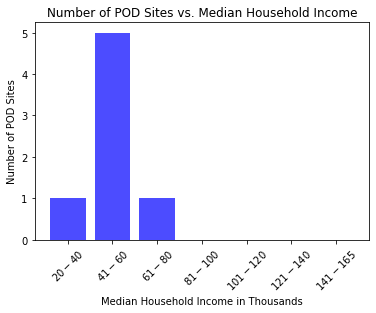

In [113]:
# Create bar chart for number of pod locations in zipcodes with median household incomes that fall in each bin
plt.bar(median_income_pod_df.iloc[:,0], median_income_pod_df.iloc[:,1], color='b', alpha=.7)
plt.xlabel('Median Household Income in Thousands')
plt.xticks(rotation = 45)
plt.ylabel('Number of POD Sites')
plt.yticks(np.arange(0, 6, 1))
plt.title('Number of POD Sites vs. Median Household Income')
plt.show()